In [1]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib import rc
import linmix
import corner

rc('text', usetex=True)
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : '14'}
rc('font', **font)

%matplotlib notebook

$$ y = \alpha + \beta x $$

parameter: median, error-, error+ (errors 84.0% confidence)
intercept: 3.43822224107, -1.37630199926, +1.37327001597
slope: 3.88981216429, -0.244134558484, +0.241910476764


<IPython.core.display.Javascript object>


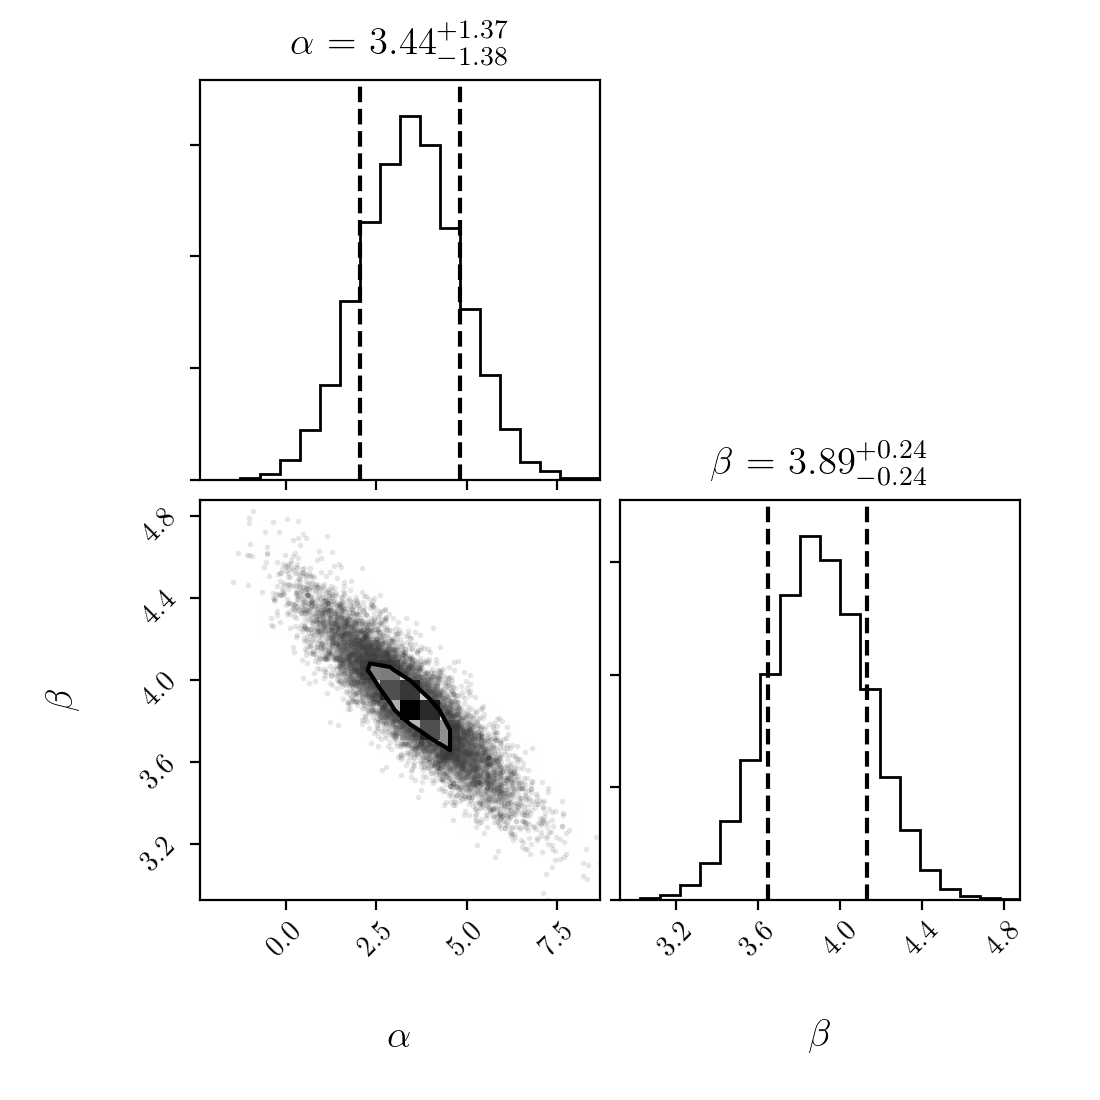

<IPython.core.display.Javascript object>


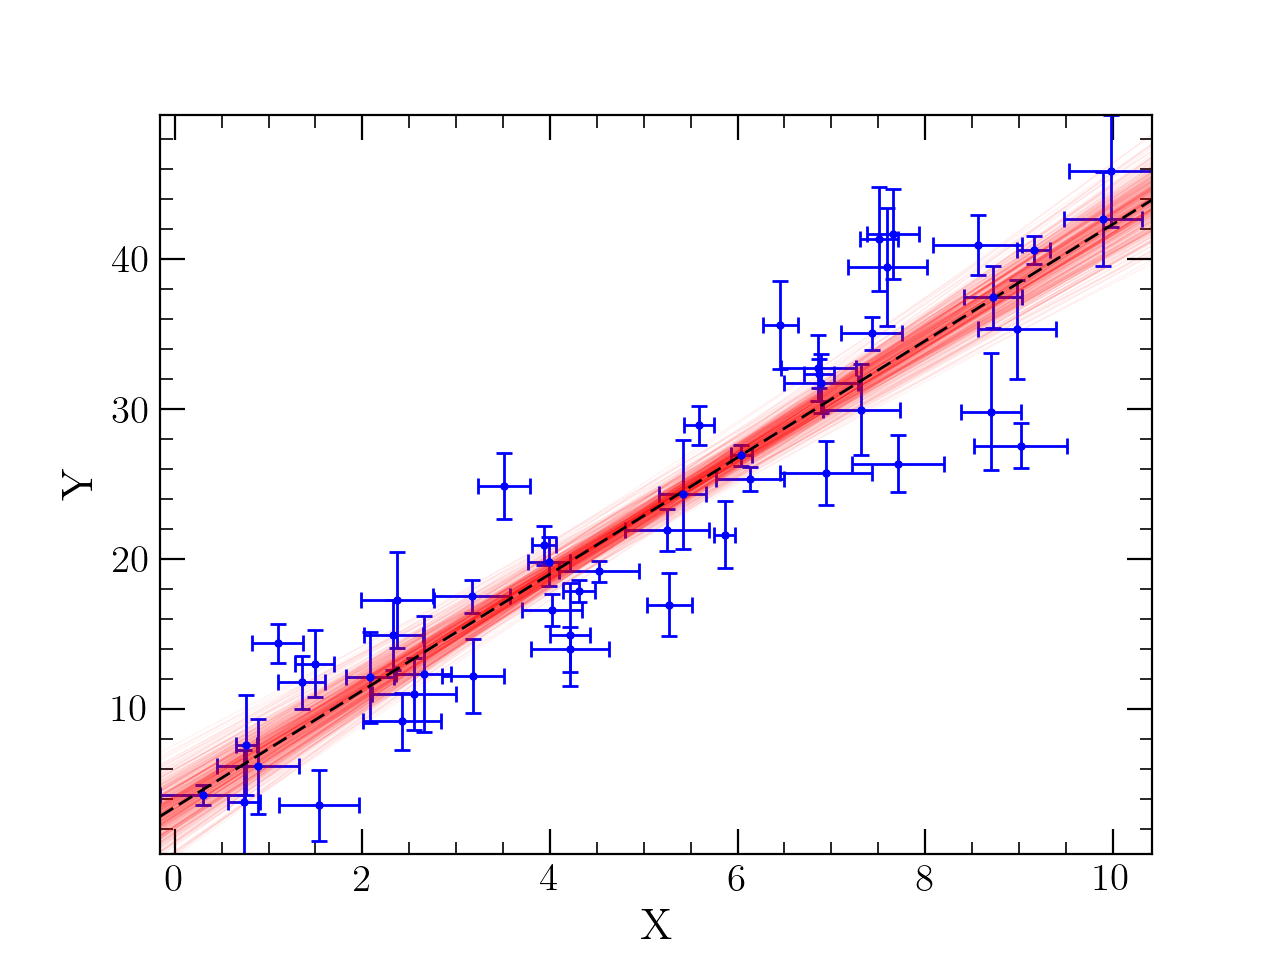

In [2]:
numpoints = 50
x = np.random.uniform(0.0,10.0,numpoints)
x_err = np.random.uniform(0.1,0.5,numpoints)
y = 4.0*x + 2.0 + np.random.normal(0.0,4.0,numpoints)
y_err = np.random.uniform(0.5,4.0,numpoints)

percent = 84.0
lm = linmix.LinMix(x, y, xsig=x_err, ysig=y_err,nchains=4)
lm.run_mcmc(silent=True,miniter=5000,maxiter=200000)
print("parameter: median, error-, error+ (errors "+str(percent)+"% confidence)")
print("intercept: {}, -{}, +{}".format(np.percentile(lm.chain['alpha'],50.0),np.percentile(lm.chain['alpha'],50.0)-np.percentile(lm.chain['alpha'],100-percent),np.percentile(lm.chain['alpha'],percent)-np.percentile(lm.chain['alpha'],50.0)))
print("slope: {}, -{}, +{}".format(np.percentile(lm.chain['beta'],50.0),np.percentile(lm.chain['beta'],50.0)-np.percentile(lm.chain['beta'],100-percent),np.percentile(lm.chain['beta'],percent)-np.percentile(lm.chain['beta'],50.0)))

corner_data = zip(*np.array([lm.chain['alpha'],lm.chain['beta']]))

cornplot = corner.corner(corner_data,labels=[r'$\alpha$',r'$\beta$'],
                         quantiles=(1-percent/100.0, percent/100.0), levels=(1-np.exp(-0.5),),
                         show_titles=True, title_kwargs={"fontsize": 14},label_kwargs={"fontsize": 14})

plt.figure()

plt.errorbar(x,y,yerr=y_err,xerr=x_err,fmt='.',color='b',capsize=3,ms=4,elinewidth=1.0)

# Fit results:
for i in range(0, len(lm.chain), 25):
    xs = np.arange(min(x-x_err),max(x+x_err)+1)
    ys = lm.chain[i]['alpha'] + xs * lm.chain[i]['beta']
    plt.plot(xs, ys, color='r', alpha=0.05, lw=0.5)

median_alpha = np.percentile(lm.chain['alpha'],50.0)
median_beta = np.percentile(lm.chain['beta'],50.0)
median_ys = median_alpha + xs * median_beta
plt.plot(xs, median_ys, '--k',lw=1.0)

#sigma1u_alpha = np.percentile(lm.chain['alpha'],100-percent)
#sigma1u_beta = np.percentile(lm.chain['beta'],percent)
#sigma1u_ys = sigma1u_alpha + xs * sigma1u_beta
#plt.plot(xs, sigma1u_ys, ':r',alpha=1.0,lw=1.0)
#
#sigma1l_alpha = np.percentile(lm.chain['alpha'],percent)
#sigma1l_beta = np.percentile(lm.chain['beta'],100-percent)
#sigma1l_ys = sigma1l_alpha + xs * sigma1l_beta
#plt.plot(xs, sigma1l_ys, ':r',alpha=1.0,lw=1.0)

plt.xlim(min(x-x_err),max(x+x_err))
plt.ylim(min(y-y_err),max(y+y_err))

plt.xlabel('X', fontsize=16)
plt.ylabel('Y', fontsize=16)

plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='major', length=9)
plt.tick_params(axis='both', which='minor', length=4.5)
plt.tick_params(axis='both', which='both',direction='in',right='on',top='on')